In [ ]:
import cv2
import os
import h5py
import numpy as np
from PIL import Image

###https://datasets.activeloop.ai/docs/ml/datasets/drive-dataset/

In [ ]:
TRAIN_IMG = './DRIVE_dataset/datasets/training/training/images'
TRAIN_LABEL = './DRIVE_dataset/datasets/training/training/1st_manual'

TEST_IMG = './DRIVE_dataset/datasets/test/test/images'
TEST_LABEL = './DRIVE_dataset/datasets/test/test/mask'

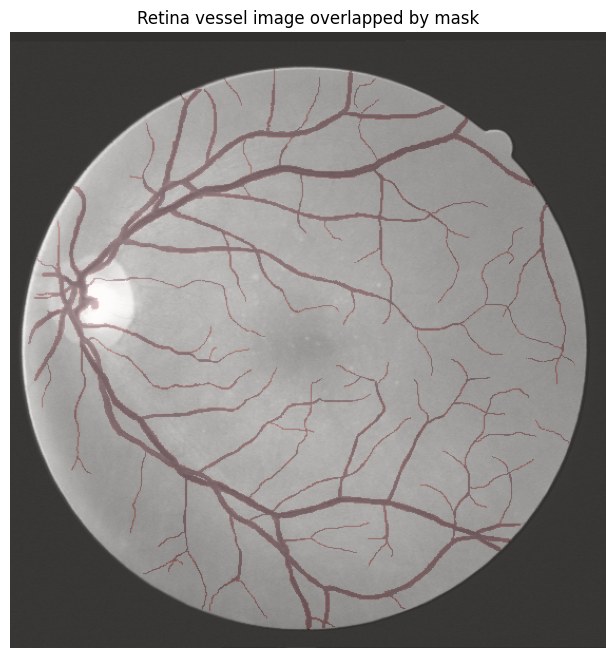

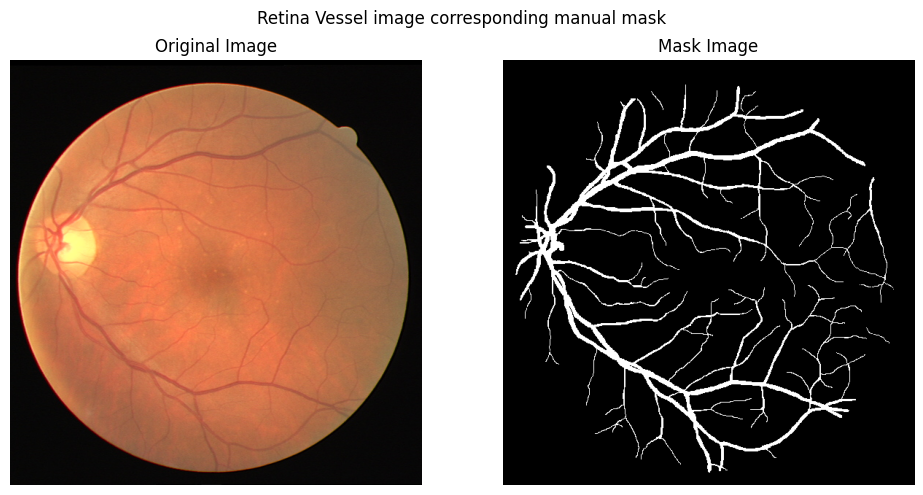

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

"""PATHS"""
image_file = "C:/Users/Mardeen/Desktop/UT/deep-learning-med/DRIVE_dataset/datasets/training/images/21_training.tif"
mask_file ="C:/Users/Mardeen/Desktop/UT/deep-learning-med/DRIVE_dataset/datasets/training/1st_manual/21_manual1.gif"


def load_as_grayscale(path):
    """
    Carica un'immagine (anche se è .gif) e la converte in un array NumPy in scala di grigi.
    Restituisce un array 2D se l'immagine è monocromatica.
    """
    img = Image.open(path).convert("L")  # "L" = converti in grayscale
    return np.array(img)

def overlay_mask(image_path, mask_path, alpha=0.5):
    """
    Sovrappone la maschera `mask_path` all’immagine base `image_path`.
    :param alpha: valore di trasparenza per la maschera (0 = trasparente, 1 = opaca).
    """
    # Carico l'immagine (base)
    base_img = load_as_grayscale(image_path)

    # Carico la maschera (.gif), sempre in scala di grigi
    mask_img = load_as_grayscale(mask_path)

    # Verifica che abbiano la stessa forma (altezza x larghezza)
    if base_img.shape != mask_img.shape:
        raise ValueError("L'immagine e la maschera hanno dimensioni diverse!")

    # Plot
    plt.figure(figsize=(8,8))
    plt.title("Retina vessel image overlapped by mask")

    # 1) Visualizzo l'immagine base in scala di grigi
    plt.imshow(base_img, cmap='gray')
    # 2) Sovrappongo la maschera usando un colormap a scelta (ad esempio 'Reds')
    #    e impostando l'alpha per regolare la trasparenza
    plt.imshow(mask_img, cmap='Reds', alpha=alpha)

    plt.axis('off')
    plt.show()
    
def plot_images_together(image_path, mask_path):
    """
    Loads two images in grayscale and displays them side by side.
    """
    # Load both images in grayscale
    base_img = Image.open(image_path)#load_as_grayscale(image_path)
    mask_img = load_as_grayscale(mask_path)

    # Create figure with two subplots, horizontally stacked
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
    fig.suptitle('Retina Vessel image corresponding manual mask')

    # Plot the first image (left)
    ax1.imshow(base_img, cmap='gray')
    ax1.set_title("Original Image")
    ax1.axis('off')

    # Plot the second image (right)
    ax2.imshow(mask_img, cmap='gray')
    ax2.set_title("Mask Image")
    ax2.axis('off')

    plt.tight_layout()
    plt.show()
    

overlay_mask(image_file, mask_file, alpha=0.2)

img_base = Image.open(image_file).convert("L")
img_mask = Image.open(mask_file).convert("L")

# se voglio la mask ridimensionata alla dimensione dell’immagine base
img_mask = img_mask.resize(img_base.size)

plot_images_together(image_file, mask_file)